In [2]:
# step:
# 1. created the data
# 2. initialized placeholders and variables
# 3. created a loss funciton
# 4. defined an optimization algorithm
# 5. iterated across random data samples to iteratively update our variables.

import tensorflow as tf
import numpy as np
import scipy.stats as st

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
sess = tf.Session()

In [4]:
mu = 1
sigma = 0.1
size = 100
# create data of 100 normal samples
x_vals = np.random.normal(mu, sigma, size)
x_vals.min(), x_vals.max()
# create target label of 100 labels value is 10
y_vals = np.repeat(10., 100)


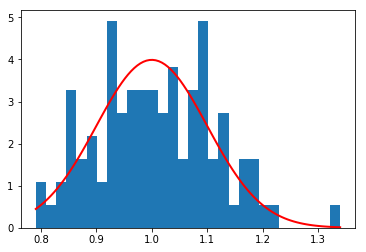

In [5]:
# explore the data
plt.hist(x_vals, 30, density=True)
s_fit = np.linspace(x_vals.min(), x_vals.max(), size)
plt.plot(s_fit, st.norm(mu, sigma).pdf(s_fit), lw=2, c='r')

In [6]:
# training data placeholder
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
# label placeholder
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
# weight
A = tf.Variable(tf.random_normal(shape=[1]))

In [7]:
# model y = X * A
my_output = tf.multiply(x_data, A)

In [8]:
# loss function  L = l(y - y')
loss = tf.square(my_output - y_target)

In [9]:
# initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
# train step for minimize the loss function
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)

In [11]:
# do training - gradient descent
for i in range(100):
    # random data
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    # training, feed the sample data
    sess.run(train_step, feed_dict={
        x_data: rand_x, y_target: rand_y})
    
    # print training log
    if (i+1) % 25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={
            x_data: rand_x, y_target: rand_y})))
        

Step #25 A = [6.5998425]
Loss = [8.267736]
Step #50 A = [8.737123]
Loss = [3.1937668]
Step #75 A = [9.299238]
Loss = [0.3038308]
Step #100 A = [9.712463]
Loss = [9.070622]


# Classification

In [12]:
# for classification
# reset the graph and reinitialize the graph session
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [13]:
# create the data from N(-1, 1) and N(3, 1)
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
# create the target label  
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))

# placeholder
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))


In [14]:
# model
my_output = tf.add(x_data, A)
my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)


In [15]:
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
# loss function
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output_expanded, labels=y_target_expanded)

In [17]:
# train_step
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [18]:
# do training - gradient descent
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    # print training log
    if (i+1) % 200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={
            x_data: rand_x, y_target: rand_y})))
    

Step #200 A = [5.613937]
Loss = [[5.7323775]]
Step #400 A = [1.5217551]
Loss = [[0.7319285]]
Step #600 A = [-0.35031343]
Loss = [[0.19346164]]
Step #800 A = [-0.8055636]
Loss = [[0.21720739]]
Step #1000 A = [-0.8807303]
Loss = [[0.3016811]]
Step #1200 A = [-1.0831319]
Loss = [[0.2595201]]
Step #1400 A = [-1.0325322]
Loss = [[0.27094233]]


# Batch & Stochastic Training

In [55]:
ops.reset_default_graph()
sess = tf.Session()

In [56]:
# batch size
batch_size = 20

# train data
x_vals = np.random.normal(1, 0.1, 100)
# target
y_vals = np.repeat(10., 100)

# placeholder and variable for model
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [57]:
# model
my_output = tf.matmul(x_data, A)

In [58]:
init = tf.global_variables_initializer()
sess.run(init)

In [59]:
# loss function
loss = tf.reduce_mean(tf.square(my_output - y_target))

In [60]:
# train step
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [61]:
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1) % 5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[1.8919162]]
Loss = 66.60382
Step #10 A = [[3.3719118]]
Loss = 45.38765
Step #15 A = [[4.585554]]
Loss = 29.535929
Step #20 A = [[5.575063]]
Loss = 19.10526
Step #25 A = [[6.3888507]]
Loss = 14.685068
Step #30 A = [[7.0501013]]
Loss = 9.70377
Step #35 A = [[7.574139]]
Loss = 7.2158384
Step #40 A = [[8.013449]]
Loss = 5.0064697
Step #45 A = [[8.366564]]
Loss = 3.2199435
Step #50 A = [[8.637913]]
Loss = 2.089158
Step #55 A = [[8.8781395]]
Loss = 1.5989213
Step #60 A = [[9.087366]]
Loss = 1.2762716
Step #65 A = [[9.237471]]
Loss = 1.5331911
Step #70 A = [[9.3648]]
Loss = 1.5275456
Step #75 A = [[9.477794]]
Loss = 1.1659136
Step #80 A = [[9.573377]]
Loss = 0.75188565
Step #85 A = [[9.609686]]
Loss = 0.7469823
Step #90 A = [[9.677409]]
Loss = 0.72070575
Step #95 A = [[9.736848]]
Loss = 1.0466688
Step #100 A = [[9.750651]]
Loss = 1.2637914


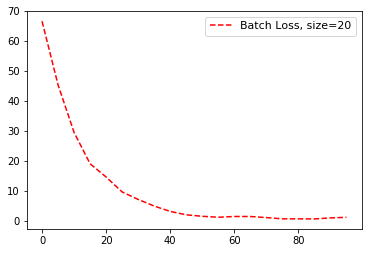

In [62]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
